In [1]:
from IPython.display import YouTubeVideo

# 1. Overview of Catkin Workspaces and Packages

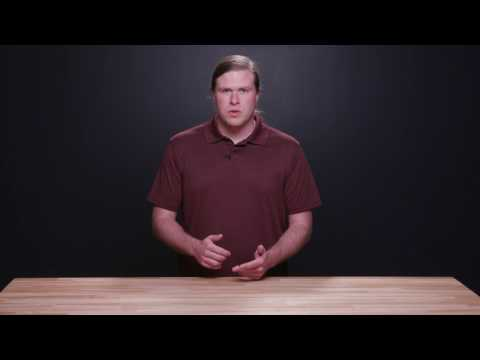

In [2]:
YouTubeVideo('VqYNipeW72o', width=960, height=540)

## Catkin packages
ROS software is organized and distributed into packages, which are directories that might contain source code for ROS nodes, libraries, datasets, and more. Each package also contains a file with build instructions - the CMakeLists.txt file - and a package.xml file with information about the package. Packages enable ROS users to organize useful functionality in a convenient and reusable format.

### Catkin workspaces
A catkin workspace is a top-level directory where you build, install, and modify catkin packages. The workspace contains all of the packages for your project, along with several other directories for the catkin system to use when building executables and other targets from your source code.

# 2. Create a Workspace

## Step 1: mkdir -p ~/catkin_ws/src
All of the ROS related code you develop throughout this course will reside in your catkin workspace. You only need to create and initialize the workspace once.

First, you need to create the top level catkin workspace directory and a sub-directory named src (pronounced source). The top level directory’s name is arbitrary, but is often called catkin_ws (an abbreviation of catkin_workspace), so we will follow this convention. You can create these two directories with a single command:

```
$ mkdir -p ~/catkin_ws/src
```

## Step 2: cd ~/catkin_ws/src
Next, navigate to the src directory with the cd command:

```
$ cd ~/catkin_ws/src
```

## Step 3: catkin_init_workspace
Now you can initialize the catkin workspace:

```
$ catkin_init_workspace
```

<img src="img/02b.jpeg">

Let’s list the contents of the current directory to see what changed.

```
$ ls -l
```

Notice that a symbolic link (CMakeLists.txt) has been created to /opt/ros/kinetic/share/catkin/cmake/toplevel.cmake

## Step 4: cd ~/catkin_ws
Return to the top level directory,

```
$ cd ~/catkin_ws
```

## Step 5: catkin_make
and build the workspace.

Note: you must issue this command from within the top level directory (i.e., within catkin_ws NOT catkin_ws/src)

```
$ catkin_make
```

While it is not essential that you have a deep understanding of what the catkin build system is, particularly if you are doing most of your development work in Python, it is helpful to learn about it. The curious reader is encouraged to read the [ROS wiki](http://wiki.ros.org/catkin/conceptual_overview).

After the command is executed you will notice the output of the build processes being echoed to your display. When it has finished you should see the following lines at the end of the output:

```
-- BUILD_SHARED_LIBS is on
-- Configuring done
-- Generating done
-- Build files have been written to: /home/robo/catkin_ws/build
####
#### Running command: "make -j2 -l2" in "/home/robo/catkin_ws/build"
####
robo@robo-virtual-machine:~/catkin_ws$
```

But what else has changed? Use the ls command again to see what is new.

```
$ ls
```

<img src="img/02c.jpeg">

You now have two new directories: build and devel. The aptly named build directory is the build space for C++ packages and, for the most part, you will not interact with it. The devel directory does contain something of interest, a file named setup.bash. This setup.bash script must be sourced before using the catkin workspace.

## Step 6: Commentary
Congratulations! You just created your first catkin workspace.

Before you begin to work with and develop your own ROS package, you should take a moment to get acquainted with catkin workspace conventional directory structure as described in the ROS Enhancement Proposal (REP) 128: http://www.ros.org/reps/rep-0128.html



# 3. Add a Package

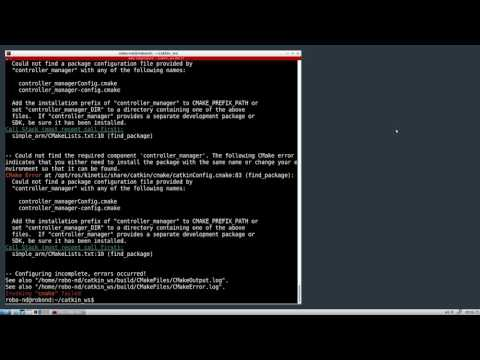

In [3]:
YouTubeVideo('UJlCdokCJJ0', width=960, height=540)

## Cloning the simple_arm Package
One of the biggest benefits of using ROS is that it has a really large community of users and developers, so there is a lot of code that you can use.

Let’s clone an existing package and add it to our newly created workspace.

You will start by navigating to the src directory and cloning the `simple_arm` package for this lesson from its github repo.

```
$ cd ~/catkin_ws/src
$ git clone https://github.com/udacity/simple_arm_01.git simple_arm
```

## Building the simple_arm package
After the repo has finished cloning, you can change directory to the top-level of the ros workspace and build the new package.

```
$ cd ~/catkin_ws
$ catkin_make
```

I see a CMake Error. "Could not find a package configuration file provided by controller_manager"

## Installing Missing Packages Using apt-get
I happen to know that controller_manager refers to a ROS package from ROS Control. We can fix this by installing the associated Debian package. If I didn't already know this, I would probably have to rely on a Google search to figure out the exact name of the package required.

```
$ sudo apt-get install ros-kinetic-controller-manager
```

OK, now that we have the controller-manager package let’s try building again. I'm still in the top level directory, so I can just type “catkin_make” and hit enter.

```
$ catkin_make
```

Looks like the build worked. Great, that wasn't so bad. Let’s run some of this code that we just cloned!


# 4. Roslaunch

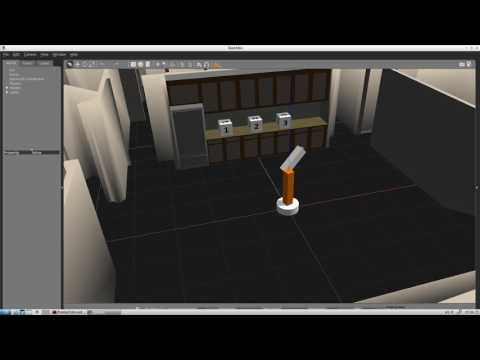

In [4]:
YouTubeVideo('EsGNppn8UlQ', width=960, height=540)

The VM has been updated since producing this video. You should expect your build to be error-free. and absent the build errors the speaker addresses in the video.

`roslaunch` allows you to do the following

- Launch ROS Master and multiple nodes with one simple command
- Set default parameters on the parameter server
- Automatically re-spawn processes that have died

To use roslaunch, you must first make sure that your workspace has been built, and sourced:

```
$ cd ~/catkin_ws
$ catkin_make
```

Once the workspace has been built, you can source it’s setup script:

```
$ source devel/setup.bash
```

With your workspace sourced you can now launch simple_arm:

```
$ roslaunch simple_arm robot_spawn.launch
```

And there you have it! Your very own 2 degree of freedom arm in simulation!

Hint: To figure out why the arm is just swinging around loosely, check out the log messages in the ROS master console.

## Note by Seonman

[ WARN] [1518684338.107586574, 261.179000000]: Deprecated syntax, please prepend 'hardware_interface/' to 'EffortJointInterface' within the <hardwareInterface> tag in joint 'joint_2'.



# 5. Rosdep

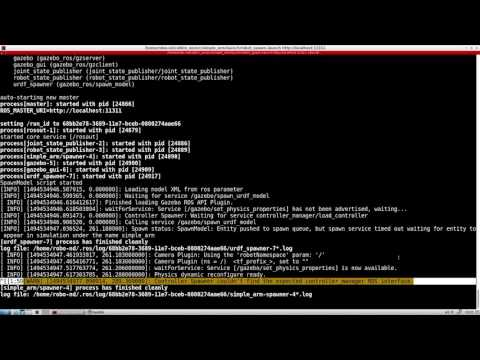

In [6]:
YouTubeVideo('Kei6k78fydE', width=960, height=540)

The VM has been updated since producing this video. You should expect your build to be error-free. and absent the build errors the speaker addresses in the video.

After the last exercise, you might have noticed the following warning line:

```
The controller spawner couldn’t find the expected controller_manager ROS interface.
```

ROS packages have two different types of dependencies: build dependencies, and run dependencies. This error message was due to a missing runtime dependency.

The rosdep tool will check for a package's missing dependencies, download them, and install them.

To check for missing dependencies in the simple_arm package:

```
$ rosdep check simple_arm
```

Note: In order for the command to work, the workspace must be sourced.

This gives you a list of the system dependencies that are missing, and where to get them.

To have rosdep install packages, invoke the following command from the root of the catkin workspace

```
$ rosdep install -i simple_arm
```

Issues with this command may arise when using a VM. If this is the case, please try:

```
sudo apt-get install ros-kinetic-gazebo-ros-control
```

And there you have it, launch the simple_arm package again and your arm should no longer be swinging around!

With all packages properly installed, you will now learn more about ROS packages, in preparation for writing your own nodes in the next lesson!

# 6. Dive Deeper into Packages

Here you'll begin your dive into ROS packages by creating one of your own. All ROS packages should reside under the src directory.

Assuming you have already sourced your ROS environment and your catkin workspace (or return here if you forgot), navigate to the src directory:

```
$ cd ~/catkin_ws/src
```

The syntax for creating a catkin package is simply,

```
$ catkin_create_pkg <your_package_name> [dependency1 dependency2 …]
```

The name of your package is arbitrary but you will run into trouble if you have multiple packages with the same name in your catkin workspace. Try to make it descriptive and unique without being excessively long. Let’s name ours “first_package” and we won’t specify any dependencies. By convention, package names are lowercase.

```
$ catkin_create_pkg first_package
```

Voilà. You just created your first catkin package! Navigating inside our newly created package reveals that it contains just two files, CMakeLists.txt and package.xml. This is a minimum working catkin package. It is not very interesting because it doesn't do anything, but it meets all the requirements for a catkin package. One of the main functions of these two files is to describe dependencies and how catkin should interact with them. We won’t pay much attention to them right now but in future lessons you will see how to modify them.

I mentioned earlier that ROS packages have a conventional directory structure. Let’s take a look at a more typical package.

- scripts (python executables)
- src (C++ source files)
- msg (for custom message definitions)
- srv (for service message definitions)
- include -> headers/libraries that are needed as dependencies
- config -> configuration files
- launch -> provide a more automated way of starting nodes

Other folders may include

- urdf (Universal Robot Description Files)
- meshes (CAD files in .dae (Collada) or .stl (STereoLithography) format)
- worlds (XML like files that are used for Gazebo simulation environments)

<img src="img/rosl2.png">

There are many packages that you can install. To see a list of available packages for the Kinetic distribution, take some time to explore [here](http://www.ros.org/browse/list.php).


# 7. Recap

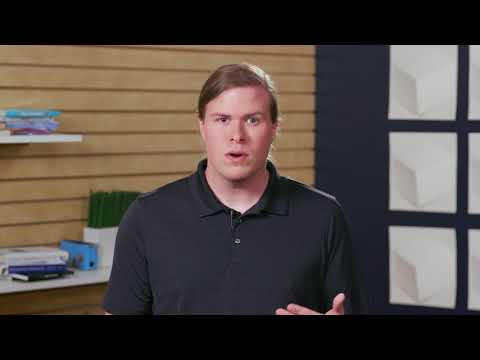

In [7]:
YouTubeVideo('OIZsHXuHWuI', width=960, height=540)

## Congratulations!
You now have some experience

- Creating workspaces
- Adding packages
- Managing Dependencies
- Troubleshooting build errors.

Additionally, you’ve had your first peek at Gazebo, a powerful tool for simulation that you will be using over and over again throughout this curriculum.

Before you actually begin writing ROS nodes in the next Lesson, make sure to take a peek at the links to the official ROS wiki documentation surrounding the topics I’ve discussed here. They will be very valuable to you in the following lesson, and throughout the rest of the program.

## Note
Before you begin the next lesson, it might be valuable to take a peek at the official [ROS wiki](http://wiki.ros.org/). There, you will be able to find in-depth documentation of some of the topics that have been covered up to this point.